# Abstract
1. 분석과제 : 클로젯 셰어 신규 구매 전반 분석 및 결과 도식화
2. 분석 방법
   - 주문 아이템 분석
       - 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
       - 신규 유저들의 구매 트렌드 파악
   - 인사이트 도출 및 액션 플랜 구체화
       - 추천 시스템 제안


## library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

#한글 폰트 깨짐 방지
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)


## data load

In [2]:
df = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")

In [3]:
df.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


## 결측치 처리

In [29]:
# brandnm의 결측치는 클로젯셰어에서 검색하여 입력.
# reg_date는 USER이 순차적으로 입력되는 특성으로 채워넣음.
df = pd.read_excel("과제수정DB.xlsx")
df['app_yn'] = df['app_yn'].fillna("N")

# 선호도 분석

## 브랜드별 선호도 분석

In [30]:
# 브랜드 갯수 총 246개
len(df['brandnm'].unique())

246

In [31]:
df['brandnm'].unique()

array(['Gucci', 'El estilo de Claire', 'Danha', 'Burberry London',
       'Prada', 'Max Mara', 'Molliolli', 'Sandro', 'Louis Vuitton',
       'Tory Burch', 'Chloe', 'Time', 'The Izzat', 'Mojosphine',
       'Ted Baker', '& Other Stories', 'Fendi', 'Balmain', 'Celine',
       'Burberry', 'Chanel', 'Dior', 'Bottega Veneta', 'Plastic Island',
       'Reneevon', 'Sorry Too Much Love', 'Saint Laurent', 'Miu Miu',
       'Yves Saint Laurent', 'Zooc', 'Vivienne Westwood',
       'Maison Kitsune', 'Margarin fingers', 'The Tint', 'Love Moschino',
       'Michaa', 'Vivienne Westwood Red Label', 'MSGM', 'Christian Dior',
       'It michaa', 'SJSJ', 'Amsale', 'Imvely', 'Chi Chi London', 'Maje',
       'Biker Starlet', 'Thom Browne', 'Jill By Jill Stuart',
       'Comme des Garcons', 'Nain', 'Dolce & Gabbana', 'Givenchy',
       'Salvatore Ferragamo', 'Andersen-Andersen', 'A.P.C.',
       'Self-portrait', 'Sonia Rykiel', 'Diane von Furstenberg',
       'Hugo Boss', 'Baum Und Pferdgarten', 'BCBG', '

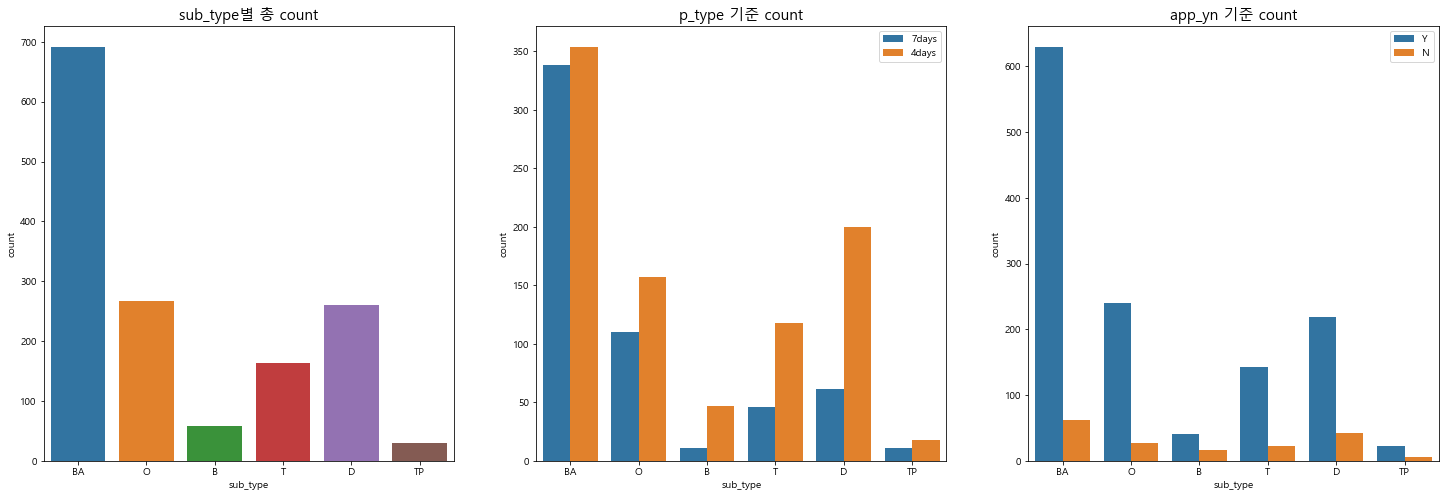

In [66]:
# 전체 sub_type의 bar chart
f, ax = plt.subplots(1, 3, figsize = (25,8))
sns.countplot(data=df, x='sub_type',  ax=ax[0])
sns.countplot(data=df, x='sub_type', hue='p_type', ax=ax[1])
sns.countplot(data=df, x='sub_type', hue='app_yn', ax=ax[2])

ax[0].set_title("sub_type별 총 count", fontsize = 15)
ax[1].set_title("p_type 기준 count", fontsize = 15)  
ax[2].set_title("app_yn 기준 count", fontsize = 15)  
    
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
plt.show()

In [32]:
df.groupby('brandnm').count()['USER'].describe()

count    245.000000
mean       5.885714
std       18.476702
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      232.000000
Name: USER, dtype: float64

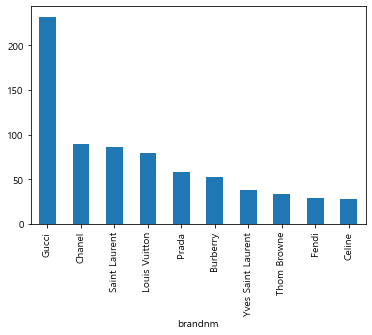

In [6]:
df.groupby('brandnm').count().sort_values(by='USER',ascending=False)['USER'].head(10).plot(kind='bar')
plt.show()

### 브랜드 인기 순위 top10 

In [7]:
brand_top10 = df.groupby('brandnm').count().sort_values(by='USER',ascending=False)['USER'].head(10).index
brand_top10

Index(['Gucci', 'Chanel', 'Saint Laurent', 'Louis Vuitton', 'Prada',
       'Burberry', 'Yves Saint Laurent', 'Thom Browne', 'Fendi', 'Celine'],
      dtype='object', name='brandnm')

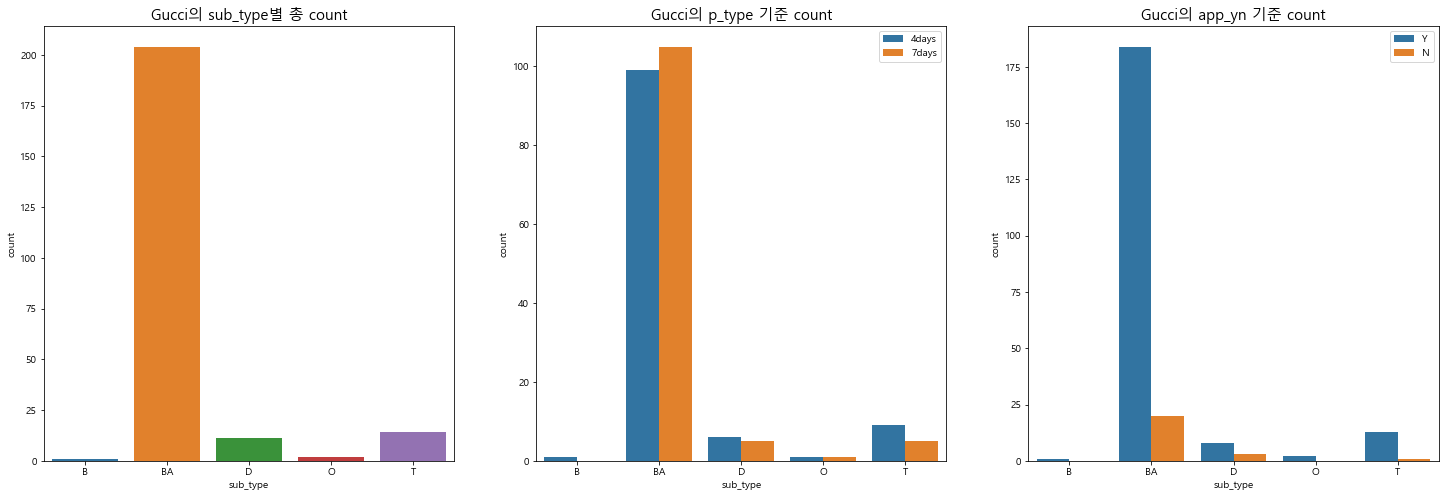

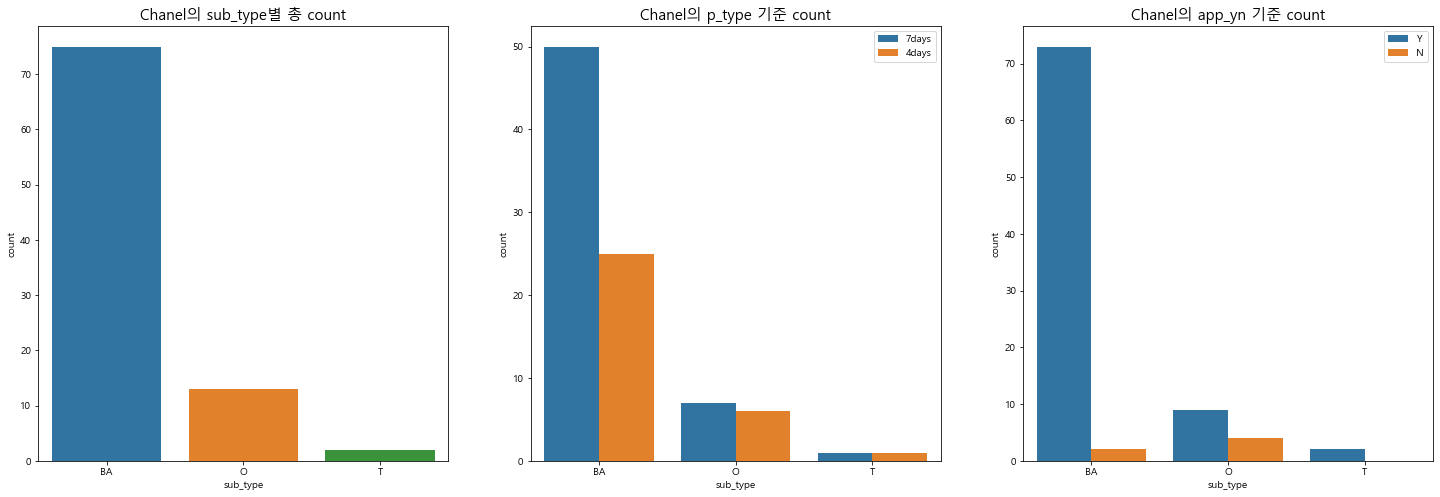

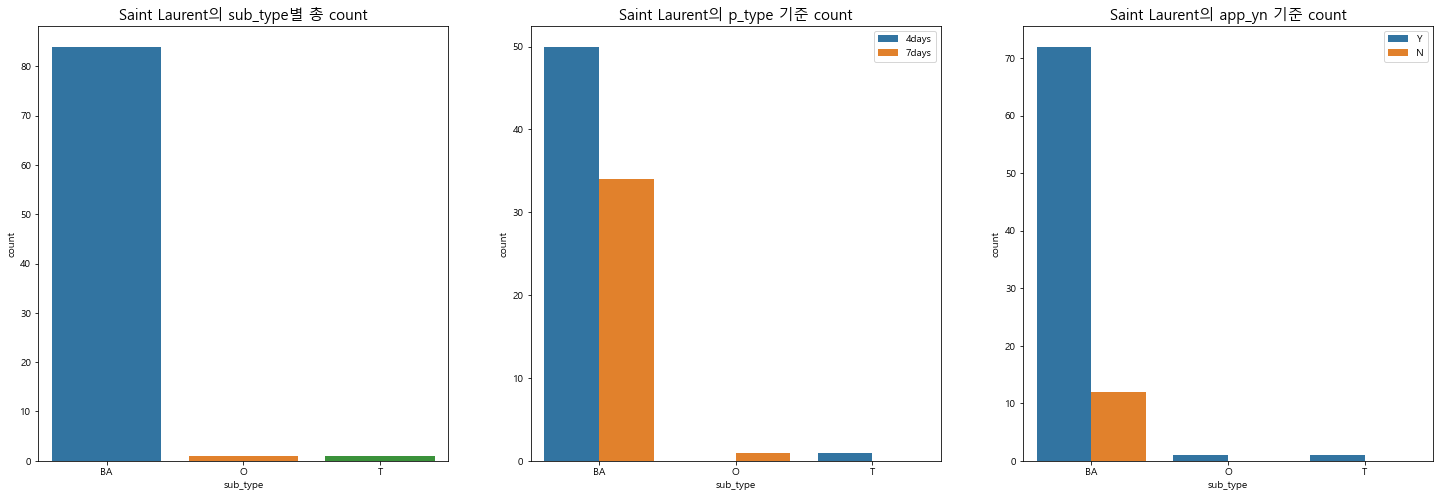

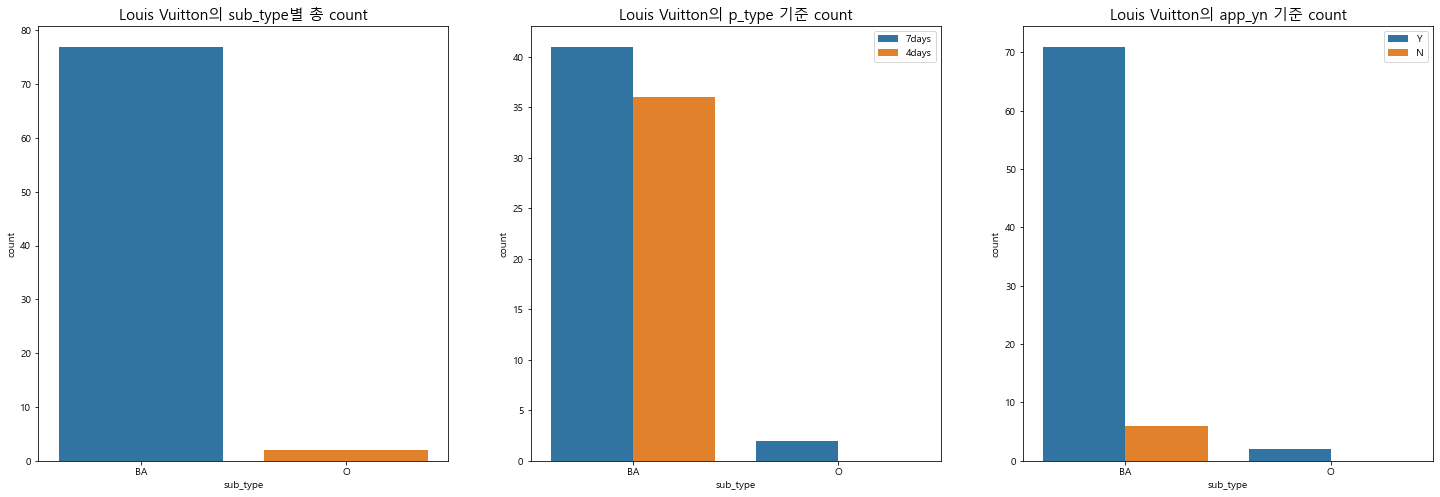

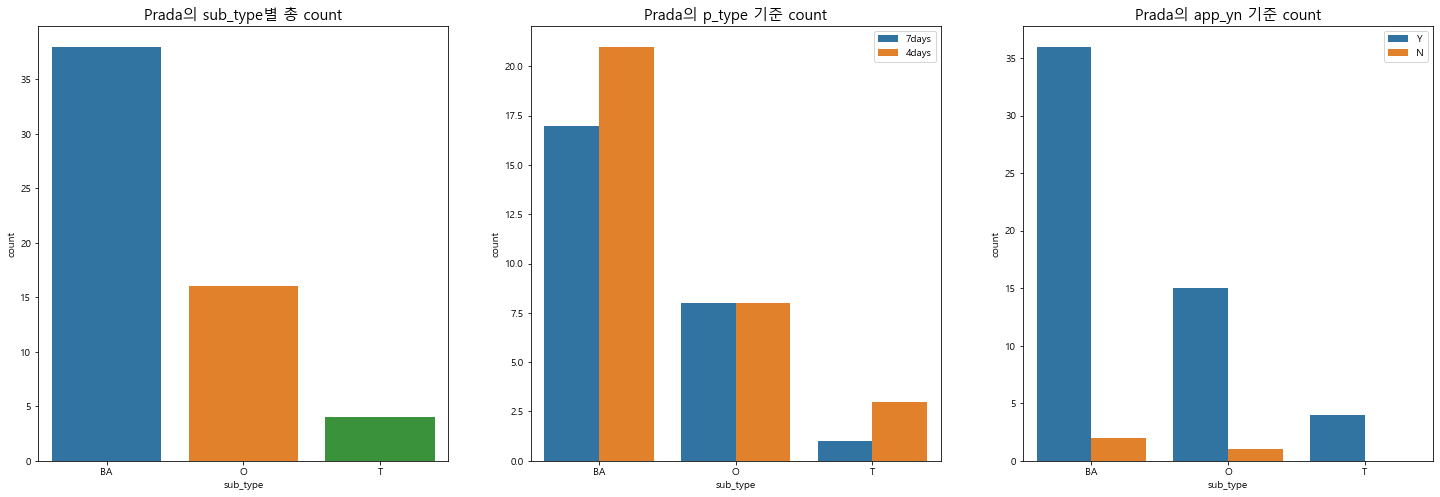

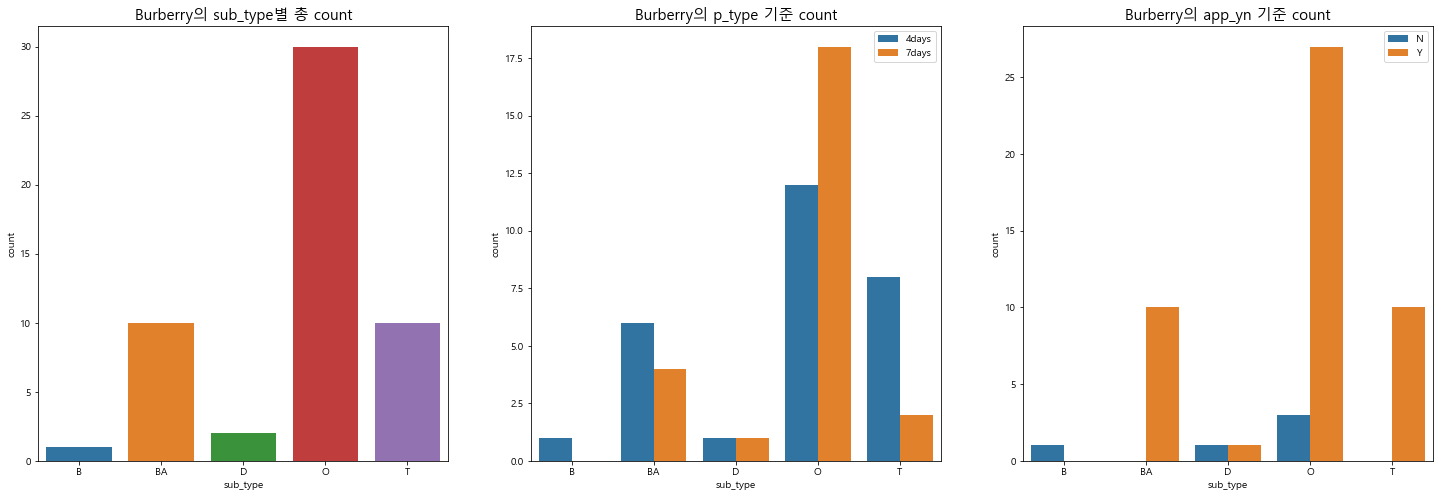

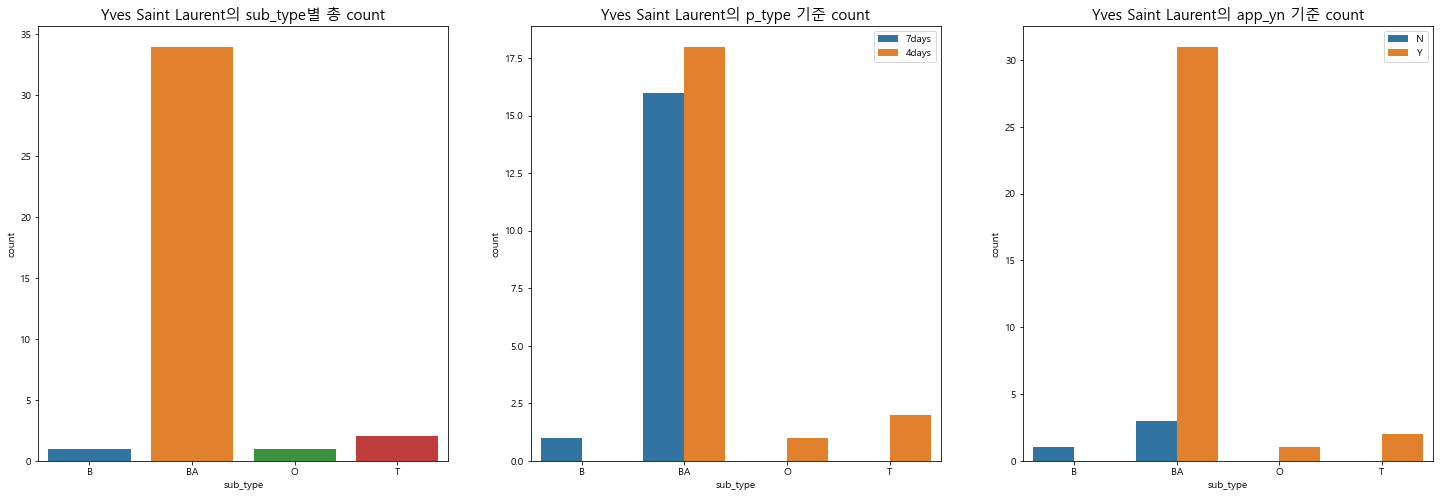

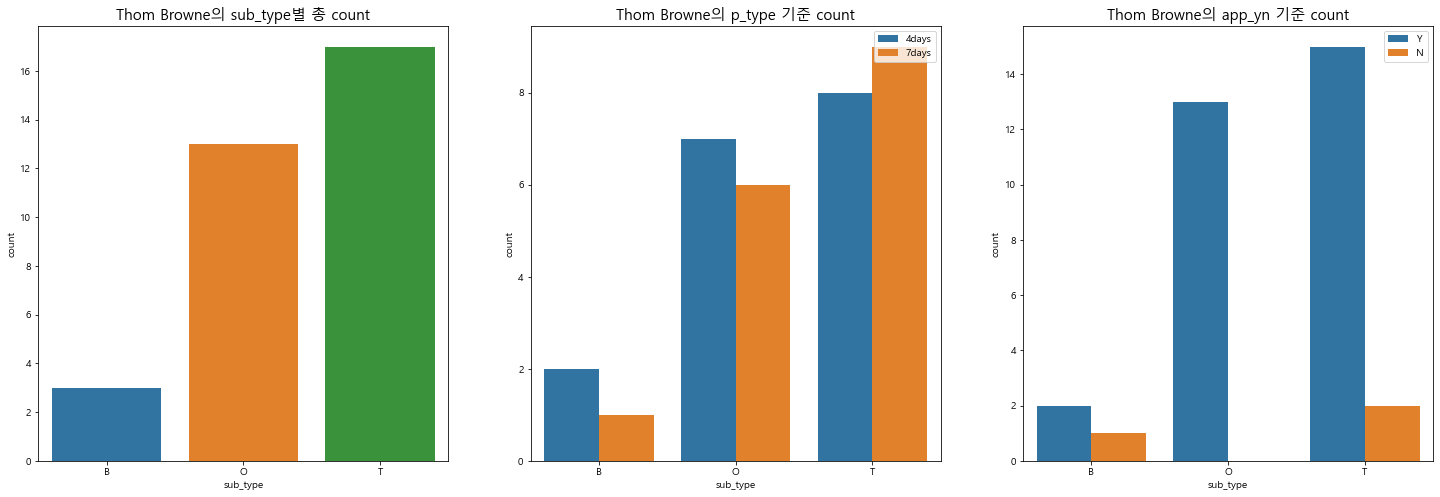

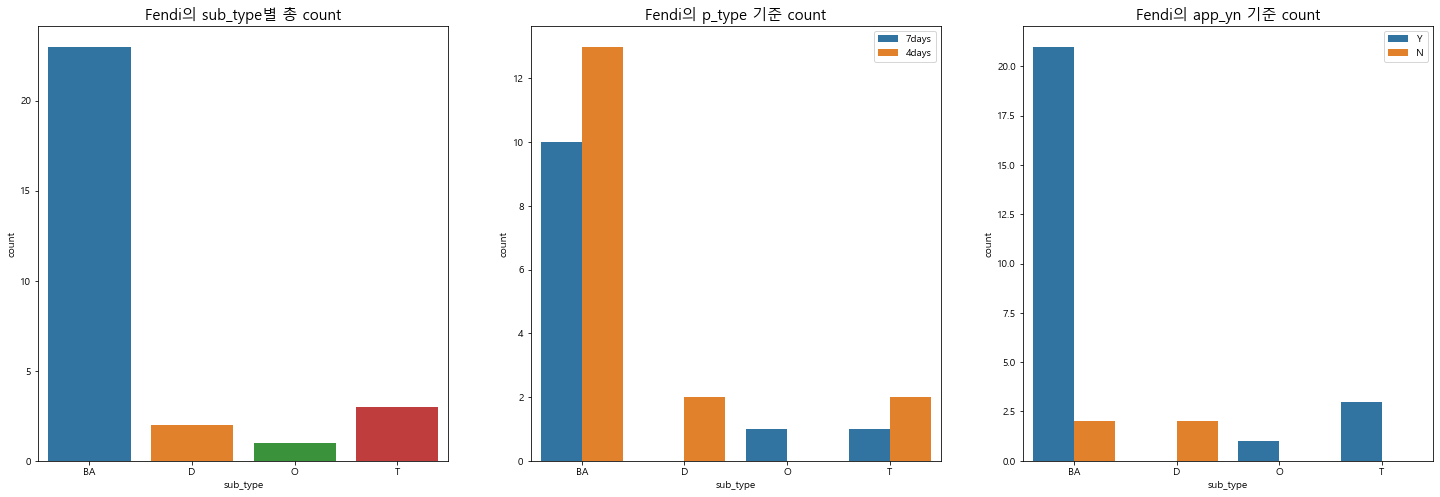

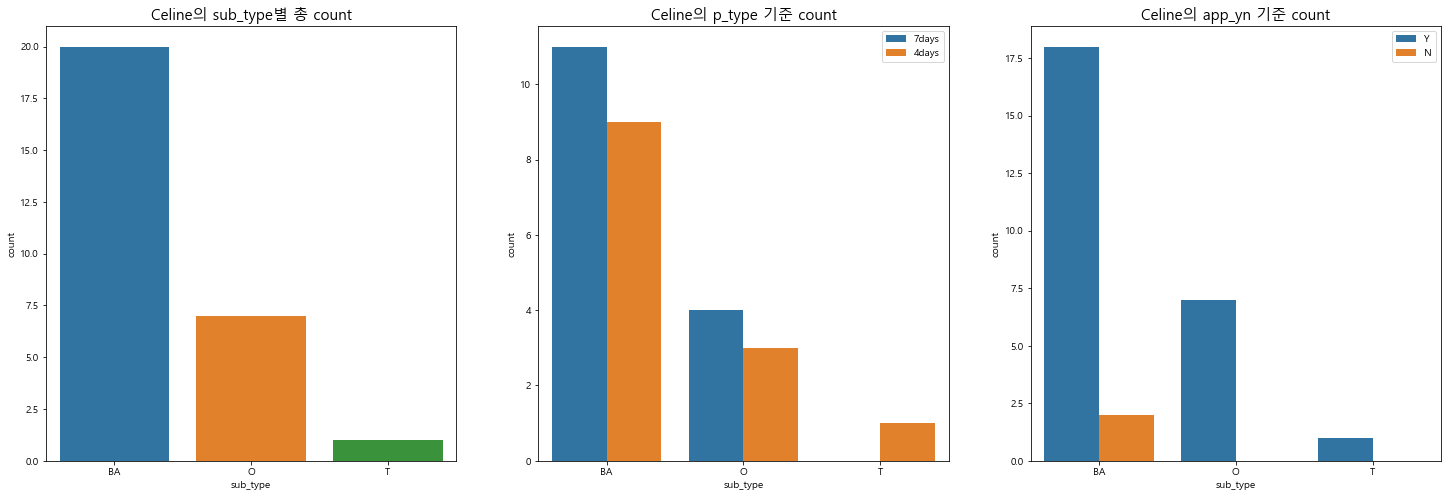

In [67]:
# 그래프 그리기
for i in brand_top10:
    brand = df[df['brandnm']==i].sort_values(by='sub_type')

    f, ax = plt.subplots(1, 3, figsize = (25,8))
    sns.countplot(data=brand, x='sub_type',  ax=ax[0])
    sns.countplot(data=brand, x='sub_type', hue='p_type', ax=ax[1])
    sns.countplot(data=brand, x='sub_type', hue='app_yn', ax=ax[2])
    
    ax[0].set_title("%s의 sub_type별 총 count" %i, fontsize = 15)
    ax[1].set_title("%s의 p_type 기준 count" %i, fontsize = 15)  
    ax[2].set_title("%s의 app_yn 기준 count" %i, fontsize = 15)  
    
    ax[1].legend(loc='upper right')
    ax[2].legend(loc='upper right')
    plt.show()

- 대부분 bag을 가장 선호
- Burberry는 outer을 가장 선호 
- Thom Browne은 bag을 구매하지 않음

## 아이템 카테고리별 선호도

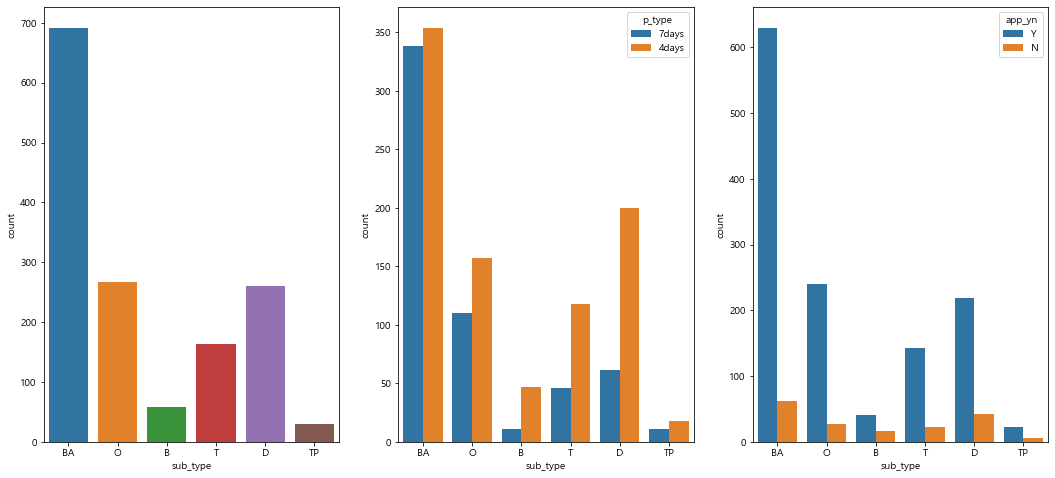

In [80]:
f, ax = plt.subplots(1, 3, figsize = (18,8))

sns.countplot(data=df, x='sub_type', ax=ax[0])
sns.countplot(data=df, x='sub_type', hue='p_type', ax=ax[1])
sns.countplot(data=df, x='sub_type', hue='app_yn', ax=ax[2])

ax[0].set_title("sub_type별 총 count", fontsize = 15)
ax[1].set_title("sub_type별 p_type에 대한 count", fontsize = 15)  
ax[2].set_title("sub_type별 app_yn에 대한 count", fontsize = 15)  
    
plt.show()

### 브랜드에 대한 카테고리별 선호도

In [112]:
# 상품별 많이 구매한 브랜드 top10 추출
sub_type = df['sub_type'].unique()

for i in sub_type :
    print(f"많이 구매한 브랜드 top10 - %s"%i)
    print(df[df['sub_type']==i].groupby('brandnm').count().sort_values(by='USER',ascending=False)['USER'].head(10))
    print("")
    

많이 구매한 브랜드 top10 - BA
brandnm
Gucci                 204
Saint Laurent          84
Louis Vuitton          77
Chanel                 75
Prada                  38
Yves Saint Laurent     34
Fendi                  23
Celine                 20
Christian Dior         15
Chloe                  12
Name: USER, dtype: int64

많이 구매한 브랜드 top10 - O
brandnm
Burberry           30
Max Mara           18
Prada              16
Chanel             13
Thom Browne        13
Balmain             7
Celine              7
Theory              7
Molliolli           7
Dolce & Gabbana     6
Name: USER, dtype: int64

많이 구매한 브랜드 top10 - B
brandnm
Sandro               3
Michaa               3
Thom Browne          3
Mine                 2
Calvin Klein         2
Alexander Mcqueen    1
Max Mara             1
Moia                 1
More Or Less         1
On&On                1
Name: USER, dtype: int64

많이 구매한 브랜드 top10 - T
brandnm
Thom Browne            17
Gucci                  14
Burberry               10
El estilo de Clai

## 명품 분석

In [113]:
# luxury 카테고리 만들기
# 출처(http://bigdata.emforce.co.kr/index.php/2021030501/)
luxury = ['Chanel','Gucci','Louis Vuitton','Prada','Hermes','Saint Laurent','Dior',
          'Burberry','Givenchy','Balenciaga','Valentino','Celine','Thom Browne','Fendi',
         'Goyard','Salvatore Ferragamo','Miu Miu','Bottega Veneta']

In [114]:
# df에 luxury column 추가
df['luxury'] = 'no'
for j in range(len(df)):
    for i in luxury:
        if (df.iloc[j,0]==i):
            df['luxury'][j]='yes'

<AxesSubplot:xlabel='luxury', ylabel='count'>

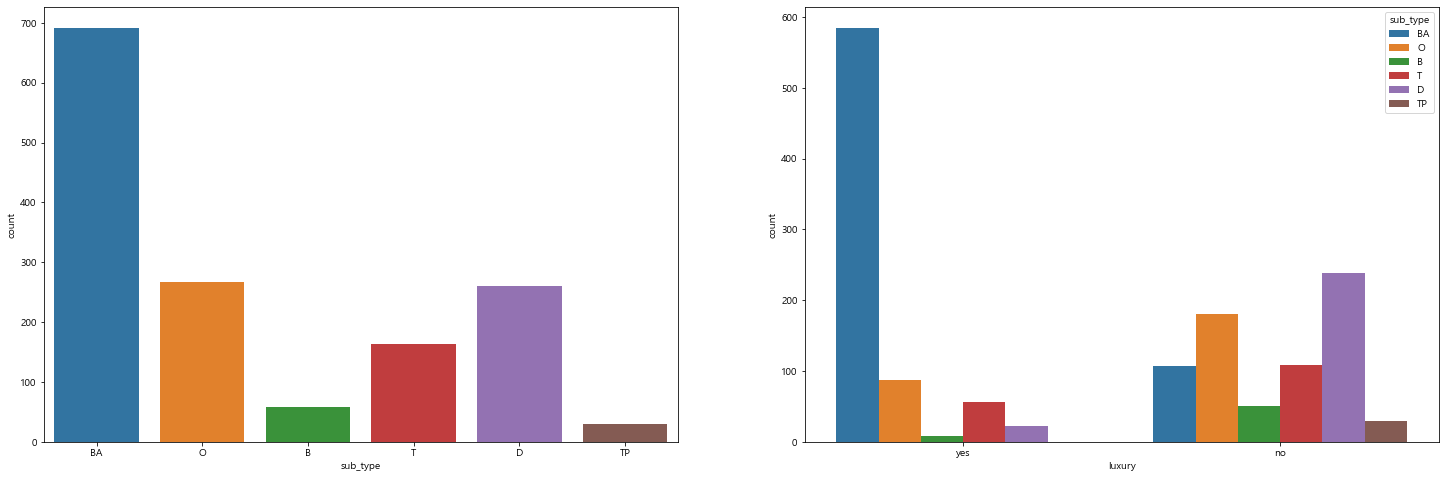

In [116]:
f, ax = plt.subplots(1, 2, figsize = (25,8))

sns.countplot(data=df, x='sub_type', ax=ax[0])
sns.countplot(data=df, x='luxury', hue='sub_type', ax=ax[1])

4일권, 7일권에서만 빌릴 수 있는 명품가방이 많다고 한다. 그래서 이와 같은 결과가 나타난것 같다. 

### luxury=no 인 데이터 분석

In [225]:
luxury_no = df.query('luxury=="no"')
luxury_no.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,no
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,no
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,no
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,no
6,Max Mara,strap basic pattern wrap-coat black,a1139960,2020-12-26,2021-01-15,7days,O,Y,no


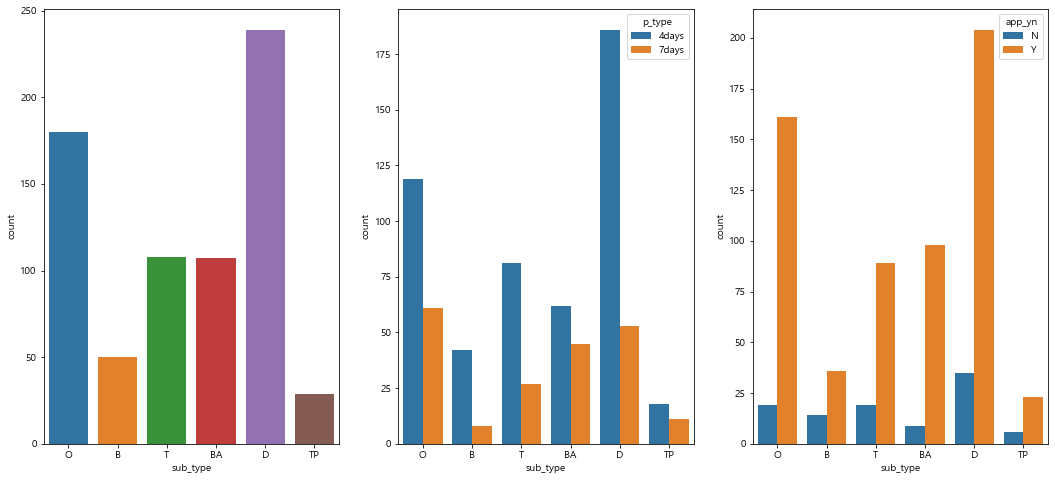

In [226]:
f, ax = plt.subplots(1, 3, figsize = (18,8))
sns.countplot(data=luxury_no, x='sub_type', ax=ax[0])
sns.countplot(data=luxury_no, x='sub_type', hue='p_type', ax=ax[1])
sns.countplot(data=luxury_no, x='sub_type', hue='app_yn', ax=ax[2])
plt.show()

Dress의 수요가 굉장히 많다.

In [227]:
luxury_no_d = luxury_no.query('sub_type=="D"')
luxury_no_d.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
19,El estilo de Claire,broach shirt layered dress brown,a1141367,2021-01-06,2021-01-14,4days,D,N,no
20,Mojosphine,Geometric pattern ribbon belt dress,a1141367,2021-01-06,2021-01-14,4days,D,N,no
29,Sandro,ruffle basic pattern A-Line dress black,a1136028,2020-12-09,2021-01-14,4days,D,Y,no
39,Plastic Island,button flower pattern A-Line dress ivory,a13934,2018-03-27,2021-01-13,4days,D,Y,no
41,Reneevon,ribbon casual dress dark pink,a1136116,2020-12-09,2021-01-13,4days,D,Y,no


In [130]:
len(luxury_no_d['brandnm'].unique())

92

In [230]:
luxury_no_d.groupby('brandnm').count().sort_values(by='USER',ascending=False).head(10)

,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
brandnm,,,,,,,,
Sandro,17,17,17,17,17,17,17,17
It michaa,12,12,12,12,12,12,12,12
Jill Stuart,10,10,10,10,10,10,10,10
Michaa,9,9,9,9,9,9,9,9
Dolce & Gabbana,8,8,8,8,8,8,8,8
Mojosphine,8,8,8,8,8,8,8,8
El estilo de Claire,7,7,7,7,7,7,7,7
Maje,7,7,7,7,7,7,7,7
Diane von Furstenberg,6,6,6,6,6,6,6,6


In [236]:
luxury_no_d.query('brandnm=="It michaa"')
# 모두 dress 

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
74,It michaa,button tweed pattern A-Line shirt-dress black,a1129105,2020-11-07,2021-01-08,4days,D,N,no
192,It michaa,lace flower pattern A-Line dress mint,a1140169,2020-12-28,2021-01-27,4days,D,Y,no
477,It michaa,button check pattern H-Line dress black,a1137370,2020-12-16,2021-02-23,4days,D,Y,no
588,It michaa,flower pattern sheer long dress,a1146672,2021-02-17,2021-02-17,4days,D,Y,no
929,It michaa,tweed belt set dress,a1150287,2021-03-22,2021-03-27,7days,D,Y,no
940,It michaa,button check pattern H-Line dress brown,a1150800,2021-03-25,2021-03-26,4days,D,Y,no
966,It michaa,button tweed pattern A-Line dress navy,a1150465,2021-03-23,2021-03-25,4days,D,Y,no
1023,It michaa,belted punching dress salmon,a1150405,2021-03-22,2021-03-24,4days,D,Y,no
1109,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,N,no
1132,It michaa,button check pattern H-Line dress black,a1149861,2021-03-18,2021-03-18,7days,D,Y,no


In [247]:
luxury_no_d.query('brandnm=="Jill Stuart"')
# 모두 dress

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
200,Jill Stuart,trimming pointed tweed dress,a1138988,2020-12-21,2021-01-27,4days,D,Y,no
520,Jill Stuart,lace flower pattern shirt-dress nude,a1147023,2021-02-20,2021-02-21,4days,D,Y,no
561,Jill Stuart,lovely lace dress salmon,a1146417,2021-02-15,2021-02-18,4days,D,Y,no
1146,Jill Stuart,trimming pointed tweed dress,a1149819,2021-03-18,2021-03-18,4days,D,N,no
1211,Jill Stuart,check button dress red,a1149591,2021-03-16,2021-03-16,4days,D,N,no
1344,Jill Stuart,ethic lace see through dress,a1148473,2021-03-07,2021-03-08,7days,D,Y,no
1371,Jill Stuart,basic pattern H-Line knit-dress navy,a1140303,2020-12-28,2021-03-05,4days,D,Y,no
1380,Jill Stuart,lovely lace dress salmon,a1148149,2021-03-03,2021-03-04,4days,D,N,no
1392,Jill Stuart,ribbon point collar dress multi,a1147956,2021-03-01,2021-03-04,4days,D,Y,no
1439,Jill Stuart,romantic sleeve dress pink,a1147531,2021-02-25,2021-03-02,4days,D,Y,no


In [249]:
luxury_no_d.query('brandnm=="Michaa"')
# 모두 dress

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
85,Michaa,basic pattern A-Line knit-dress nude,a1140842,2021-01-02,2021-01-07,4days,D,Y,no
297,Michaa,slit basic pattern H-Line shirt-dress white,a1143670,2021-01-18,2021-01-21,7days,D,Y,no
347,Michaa,slit basic pattern H-Line dress black,a1112419,2020-08-15,2021-01-18,4days,D,Y,no
539,Michaa,ruffle basic pattern A-Line dress black,a1146755,2021-02-17,2021-02-19,4days,D,N,no
644,Michaa,black line point belt dress white,a1146132,2021-02-11,2021-02-14,7days,D,Y,no
800,Michaa,check pattern H-Line dress,a1145226,2021-02-02,2021-02-02,4days,D,N,no
855,Michaa,gather basic pattern H-Line dress green,a1144560,2021-01-26,2021-03-31,4days,D,Y,no
1107,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,N,no
1320,Michaa,check pattern H-Line dress pink,a116510,2019-02-21,2021-03-09,7days,D,Y,no


In [250]:
luxury_no_d.query('brandnm=="Mojosphine"')
# 모두 dress

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
20,Mojosphine,Geometric pattern ribbon belt dress,a1141367,2021-01-06,2021-01-14,4days,D,N,no
214,Mojosphine,basic pattern H-Line dress grey,a1144535,2021-01-26,2021-01-26,7days,D,Y,no
298,Mojosphine,eight button belted dress red,a1143006,2021-01-14,2021-01-21,7days,D,Y,no
408,Mojosphine,button basic pattern H-Line dress navy,a1146892,2021-02-19,2021-02-26,4days,D,Y,no
504,Mojosphine,pintuck dress yellow,a1145316,2021-02-03,2021-02-22,4days,D,Y,no
618,Mojosphine,peplum tweed pattern H-Line dress black,a14106,2018-04-07,2021-02-16,4days,D,Y,no
1090,Mojosphine,basic pattern H-Line dress beige,a1105980,2020-06-25,2021-03-20,7days,D,Y,no
1098,Mojosphine,embroidery basic pattern slip-dress black,a1148581,2021-03-07,2021-03-20,7days,D,Y,no


결론적으로, 명품이 아닌 브랜드에 있어서는 dress의 수요가 매우 높다.

# 신규유저들의 구매 트렌드 파악

In [140]:
df.groupby('USER').count()['goodsnm'].describe()
# 75%유저가 1개만 빌림.

count    1234.000000
mean        1.192058
std         0.729120
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: goodsnm, dtype: float64

In [147]:
df.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,yes
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,no
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,no
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,no
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,no


## 2개 이상 빌린 유저들

In [191]:
# 2개 이상 빌린 유저들 추출
count = df.groupby('USER').count()
heavy = count[count['goodsnm'] >= 2].index

heavy_df = []
for j in range(len(df)):
    for h in heavy :
        if(df['USER'][j] == h):
            heavy_df.append(df.iloc[j,:])
heavy_df = pd.DataFrame(heavy_df)

In [223]:
heavy_df.head(10)

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,no
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,no
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,no
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,yes
17,Time,pocket basic pattern coat black,a1142921,2021-01-14,2021-01-14,4days,O,Y,no
19,El estilo de Claire,broach shirt layered dress brown,a1141367,2021-01-06,2021-01-14,4days,D,N,no
20,Mojosphine,Geometric pattern ribbon belt dress,a1141367,2021-01-06,2021-01-14,4days,D,N,no
23,Fendi,stripe pattern two way bucket bag brown,a1142679,2021-01-13,2021-01-14,7days,BA,Y,yes
24,Balmain,basic pattern sweat-shirts white,a1142679,2021-01-13,2021-01-14,7days,T,Y,no
25,Celine,lined zip-up jumper black,a1142679,2021-01-13,2021-01-14,7days,O,Y,yes


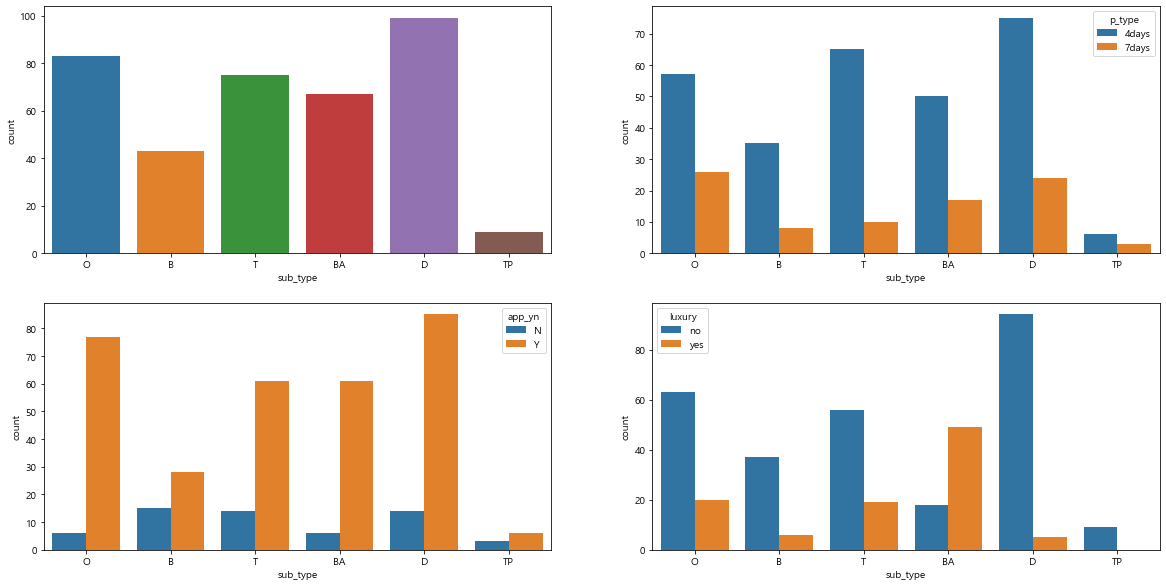

In [291]:
f, ax = plt.subplots(2, 2, figsize = (20,10))
sns.countplot(data=heavy_df, x='sub_type', ax=ax[0,0])
sns.countplot(data=heavy_df, x='sub_type', hue='p_type', ax=ax[0,1])
sns.countplot(data=heavy_df, x='sub_type', hue='app_yn', ax=ax[1,0])
sns.countplot(data=heavy_df, x='sub_type', hue='luxury', ax=ax[1,1])
plt.show()

In [238]:
heavy_df.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,luxury
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,no
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,no
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,no
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,yes
17,Time,pocket basic pattern coat black,a1142921,2021-01-14,2021-01-14,4days,O,Y,no


In [259]:
temp = pd.DataFrame(heavy_df.groupby(['USER','sub_type']).count()['goodsnm'].unstack())
temp.head()

sub_type,B,BA,D,O,T,TP
USER,,,,,,
a1100548,1.0,1.0,NaN,NaN,NaN,NaN
a1102098,NaN,1.0,NaN,1.0,NaN,NaN
a1110169,NaN,1.0,1.0,NaN,NaN,NaN
a111030,NaN,1.0,1.0,NaN,NaN,NaN
a1110964,NaN,1.0,NaN,1.0,NaN,NaN


In [281]:
# heavy user의 첫구매의 sub_type 
print("heavy 유저가 첫구매에 B를 포함할 확률:",temp['B'].notnull().sum()/len(temp))
print("heavy 유저가 첫구매에 BA를 포함할 확률:",temp['BA'].notnull().sum()/len(temp))
print("heavy 유저가 첫구매에 D를 포함할 확률:",temp['D'].notnull().sum()/len(temp))
print("heavy 유저가 첫구매에 O를 포함할 확률:",temp['O'].notnull().sum()/len(temp))
print("heavy 유저가 첫구매에 T를 포함할 확률:",temp['T'].notnull().sum()/len(temp))
print("heavy 유저가 첫구매에 TP를 포함할 확률:",temp['TP'].notnull().sum()/len(temp))

heavy 유저가 첫구매에 B를 포함할 확률: 0.20863309352517986
heavy 유저가 첫구매에 BA를 포함할 확률: 0.4748201438848921
heavy 유저가 첫구매에 D를 포함할 확률: 0.4172661870503597
heavy 유저가 첫구매에 O를 포함할 확률: 0.5251798561151079
heavy 유저가 첫구매에 T를 포함할 확률: 0.3237410071942446
heavy 유저가 첫구매에 TP를 포함할 확률: 0.050359712230215826


## 추천시스템

### brandnm으로 유사도 계산

In [484]:
df = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")
df['app_yn'] = df['app_yn'].fillna("N")
df = df.dropna(axis=0)

In [148]:
# library import 
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [486]:
goods_vector = count_vector.fit_transform(df['goodsnm'])
goods_vector

<1437x474 sparse matrix of type '<class 'numpy.int64'>'
	with 7040 stored elements in Compressed Sparse Row format>

In [487]:
# 코사인 유사도를 구한 벡터를 미리 저장
from sklearn.metrics.pairwise import cosine_similarity
goods_sim = cosine_similarity(goods_vector, goods_vector).argsort()[:,::-1]
print(goods_sim[:1])

[[   0  923  412 ... 1019  576  718]]


In [488]:
goods_sim.shape

(1437, 1437)

In [489]:
def find_sim(df, goods_name):
    # 특정 상품 정보 추출
    target_goodsnm_index = df[df['goodsnm']==goods_name].index.values
    
    # 코사인 유샤도 중 비슷한 코사인 유사도를 가진 정보 추출
    sim_index = goods_sim[target_goodsnm_index, :10].reshape(-1)
    # 본인 제외
    sim_index = sim_index[sim_index != target_goodsnm_index]
    
    # data frame 형성, vote_count로 정렬
    result = df.iloc[sim_index][:10]
    return result

In [490]:
find_sim(df, goods_name='buckle basic pattern zipup-jumper navy')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
135,Chanel,pocket graphics pattern zipup-jumper navy,a1112031,2020-08-15,2021-01-01,7days,O,N
1304,Burberry London,basic pattern t-shirts navy,a187447,2020-03-09,2021-03-10,4days,T,N
291,ACNE STUDIOS,basic pattern sweater navy,a1143946,2021-01-21,2021-01-21,7days,T,Y
1298,Valentino,pocket basic pattern slacks navy,a187924,2020-03-11,2021-03-10,7days,B,N
1305,System,pocket basic pattern slacks navy,a187447,2020-03-09,2021-03-10,4days,B,N
680,Dolce & Gabbana,strap basic pattern jacket navy,a1145658,2021-02-06,2021-02-09,4days,O,Y
319,Thom Browne,pocket basic pattern blazer navy,a133972,2019-07-17,2021-01-20,4days,O,Y
1173,BCBG Max Azria,basic pattern H-Line dress navy,a1149542,2021-03-16,2021-03-17,4days,D,Y
1270,Burberry,basic pattern wool sweater navy,a1149010,2021-03-11,2021-03-11,4days,T,Y


### brandnm+goodsnm 결합하여 유사도 계산

In [491]:
df_none = pd.read_excel("클로젯셰어_과제DB 대체 자료.xlsx")
df_none['app_yn'] = df_none['app_yn'].fillna("N")
df_none = df_none.dropna(axis=0)

In [500]:
df_none['brand_goods'] = df_none['brandnm']+" "+df_none['goodsnm']
df_none.head(10)

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,brand_goods
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,Gucci flower dionysus shoulder bag beige
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,El estilo de Claire beads cropped jacket black
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,Danha embroidery point oriental mini skirt blue
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,Danha graphics pattern top pink
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,Burberry London buckle basic pattern zipup-jum...
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,Prada ruffle detail long coat
6,Max Mara,strap basic pattern wrap-coat black,a1139960,2020-12-26,2021-01-15,7days,O,Y,Max Mara strap basic pattern wrap-coat black
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,2019-01-29,2021-01-15,4days,O,Y,Molliolli pocket basic pattern fur-outer ivory
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,Gucci dionysus cross bag
9,Sandro,pattern pointed cardigan black,a117306,2019-03-02,2021-01-15,7days,O,Y,Sandro pattern pointed cardigan black


In [493]:
vector = count_vector.fit_transform(df_none['brand_goods'])
vector

<1437x801 sparse matrix of type '<class 'numpy.int64'>'
	with 9190 stored elements in Compressed Sparse Row format>

In [494]:
# 코사인 유사도를 구한 벡터를 미리 저장
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vector, vector).argsort()[:,::-1]
print(sim[:1])

[[   0  923 1403 ... 1235  633  718]]


In [495]:
goods_sim.shape

(1437, 1437)

In [496]:
def find_sim2(df_none, brandgoods):
    # 특정 상품 정보 추출
    target_goodsnm_index = df_none[df_none['brand_goods']==brandgoods].index.values
    
    # 코사인 유샤도 중 비슷한 코사인 유사도를 가진 정보 추출
    sim_index = goods_sim[target_goodsnm_index, :10].reshape(-1)
    # 본인 제외
    sim_index = sim_index[sim_index != target_goodsnm_index]
    
    # data frame 형성\
    result = df_none.iloc[sim_index][:20]
    return result

In [502]:
find_sim2(df_none, brandgoods='Prada ruffle detail long coat')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,brand_goods
664,System,fur detail coat beige 2,a1146001,2021-02-10,2021-02-10,4days,O,Y,System fur detail coat beige 2
856,Nain,wrap detail coat beige,a1151465,2021-03-31,2021-03-31,7days,O,N,Nain wrap detail coat beige
371,Inusway,ruffle detail blouse skyblue,a1141277,2021-01-05,2021-01-17,4days,T,Y,Inusway ruffle detail blouse skyblue
454,Mine,simple design long coat black,a1147394,2021-02-24,2021-02-24,4days,O,Y,Mine simple design long coat black
976,Burberry,hook detail trench coat beige,a1149812,2021-03-17,2021-03-25,4days,O,Y,Burberry hook detail trench coat beige
1080,Karl Lagerfeld,trimming detail pointed coat multi,a1149926,2021-03-18,2021-03-21,7days,O,Y,Karl Lagerfeld trimming detail pointed coat multi
48,Prada,collar point long coat multi,a189599,2020-03-22,2021-01-13,7days,O,Y,Prada collar point long coat multi
1073,Jill Stuart,fur detail padding long jumper,a1147301,2021-02-23,2021-03-22,4days,O,Y,Jill Stuart fur detail padding long jumper
1071,Time,unbalance ruffle detail knit dress,a1150333,2021-03-22,2021-03-22,4days,D,Y,Time unbalance ruffle detail knit dress


In [505]:
find_sim(df, goods_name='ruffle detail long coat')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
664,System,fur detail coat beige 2,a1146001,2021-02-10,2021-02-10,4days,O,Y
856,Nain,wrap detail coat beige,a1151465,2021-03-31,2021-03-31,7days,O,N
371,Inusway,ruffle detail blouse skyblue,a1141277,2021-01-05,2021-01-17,4days,T,Y
454,Mine,simple design long coat black,a1147394,2021-02-24,2021-02-24,4days,O,Y
976,Burberry,hook detail trench coat beige,a1149812,2021-03-17,2021-03-25,4days,O,Y
1080,Karl Lagerfeld,trimming detail pointed coat multi,a1149926,2021-03-18,2021-03-21,7days,O,Y
48,Prada,collar point long coat multi,a189599,2020-03-22,2021-01-13,7days,O,Y
1073,Jill Stuart,fur detail padding long jumper,a1147301,2021-02-23,2021-03-22,4days,O,Y
1071,Time,unbalance ruffle detail knit dress,a1150333,2021-03-22,2021-03-22,4days,D,Y


두개가 같은 결과를 나타냄.

# 0519 회의 후 진행 사항
- 색상에 대한 선호도
- 카테고리별 세부 품목에 대한 선호도

## 색상에 대한 선호도

In [9]:
df['component'] = df['goodsnm'].str.split()

In [10]:
df['color'] = 0

def color_ext(color):
    for i in range(len(df)):
        if (color in df['component'][i]): 
            df['color'].iloc[i]=color

In [11]:
color_list = ['beige','black','blue','pink','navy','ivory',
             'white','brown','cream','purple','deeppink',
             'nude','burgundy','grey','red',
            'skyblue', 'gold','mint','green','yellow',
             'collar','charcoal',' khaki','orange','lavender','mustard',
             'wine','salmon','multi','rainbow','bluegreen','black&beige',
             'olive']

for i in color_list:
    color_ext(i)

In [12]:
# 중복 색 처리
for i in range(len(df)):
    if ('gray' in df['component'][i]):
       df['color'].iloc[i] = 'grey'
    if ('gray_1' in df['component'][i]):
       df['color'].iloc[i] = 'grey'
    if ('black1' in df['component'][i]):
       df['color'].iloc[i] = 'black'
    if ('black_1' in df['component'][i]):
       df['color'].iloc[i] = 'black'
    if ('Black' in df['component'][i]):
       df['color'].iloc[i] = 'black'

In [13]:
df[['component','color']].head()

,component,color
0,"[flower, dionysus, shoulder, bag, beige]",beige
1,"[beads, cropped, jacket, black]",black
2,"[embroidery, point, oriental, mini, skirt, blue]",blue
3,"[graphics, pattern, top, pink]",pink
4,"[buckle, basic, pattern, zipup-jumper, navy]",navy


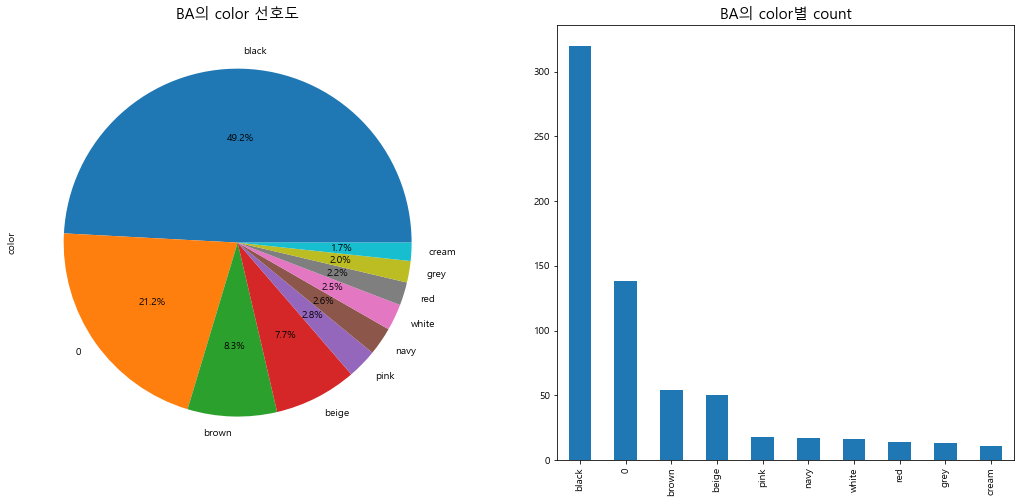

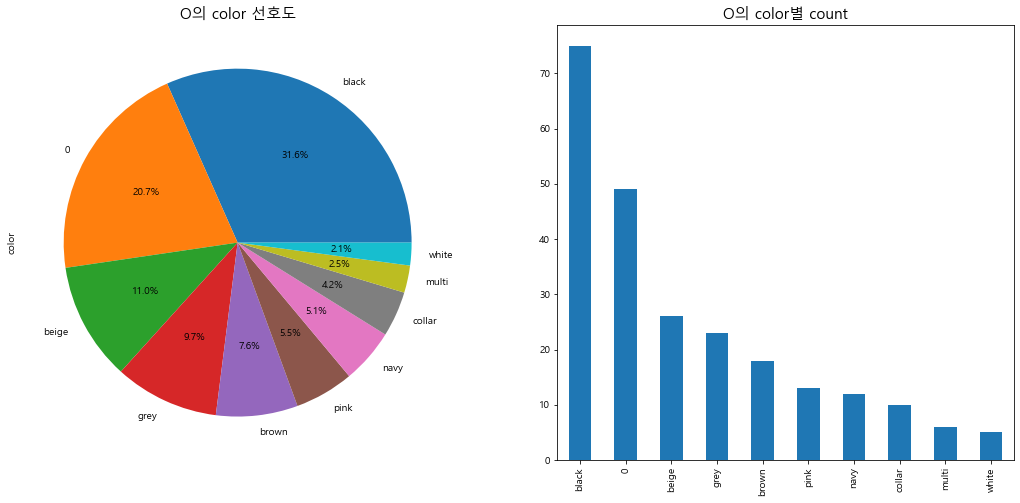

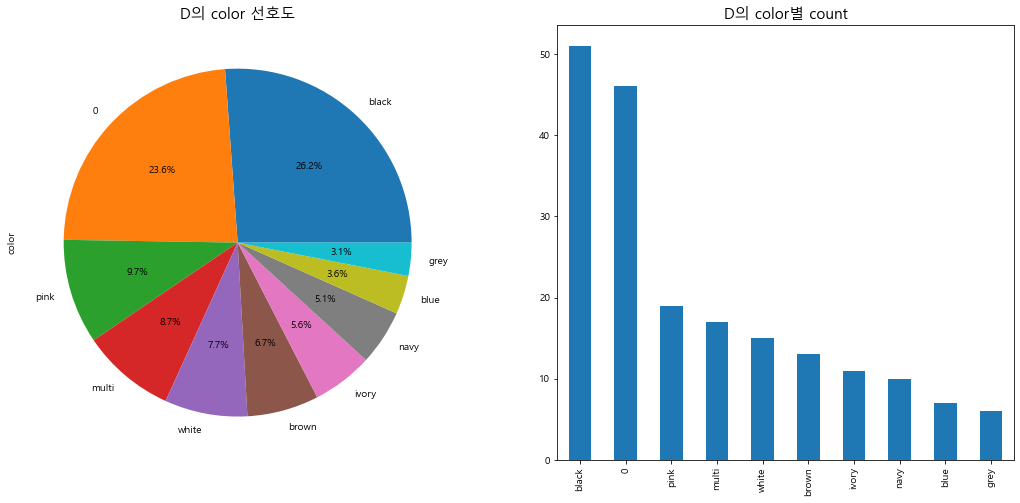

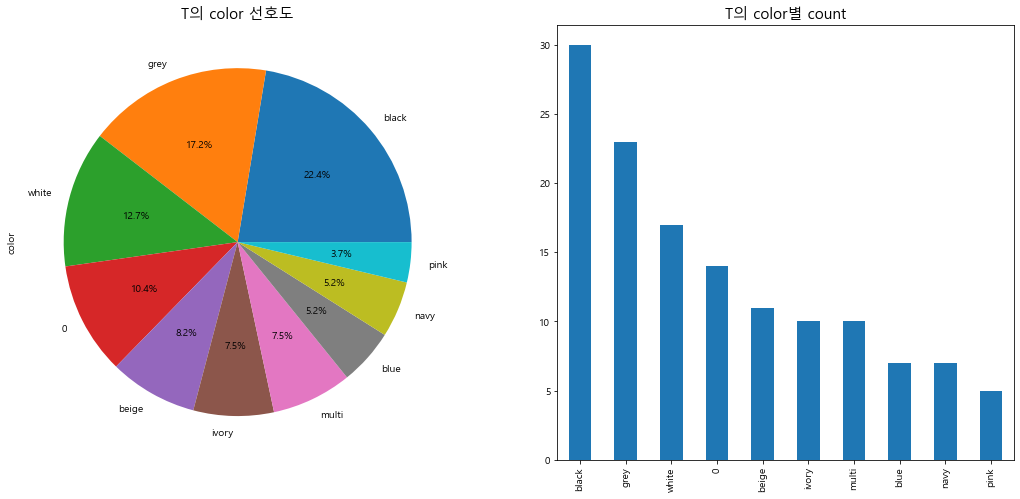

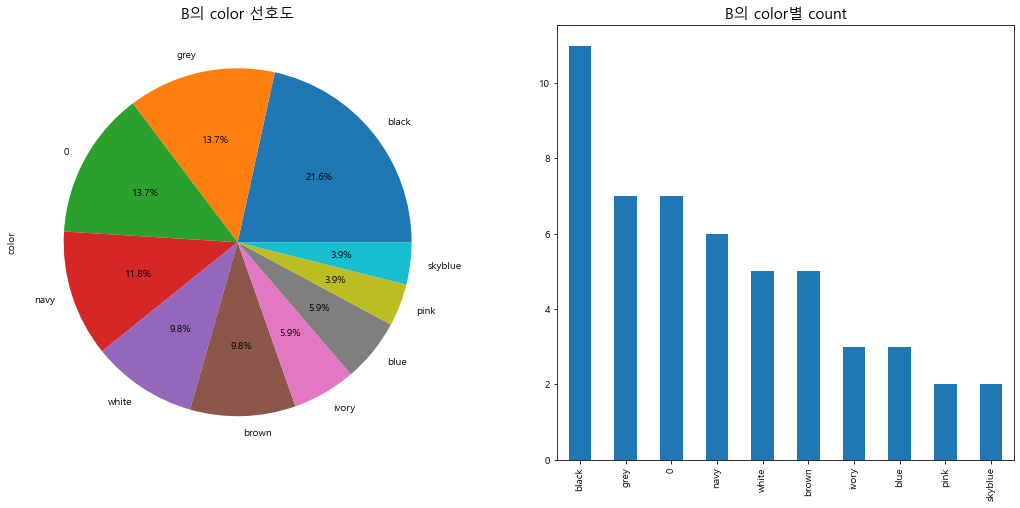

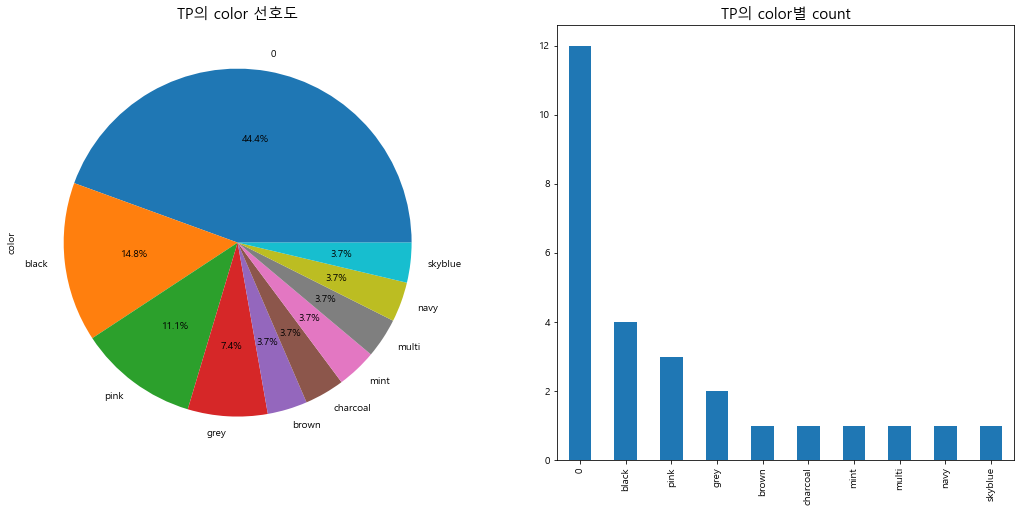

In [15]:
# 아이템 카테고리별 색상 선호도
list = df['sub_type'].value_counts().index

for i in list:
    f, ax = plt.subplots(1, 2, figsize = (18,8))

    df[df['sub_type']==i]['color'].value_counts()[:10].plot.pie(autopct = '%1.1f%%',shadow = False, ax=ax[0])
    df[df['sub_type']==i]['color'].value_counts()[:10].plot(kind='bar', ax=ax[1])

    ax[0].set_title("%s의 color 선호도"%i, fontsize = 15)
    ax[1].set_title("%s의 color별 count"%i, fontsize = 15)  

    plt.show()

## 세부 종류 정확하게 뽑기

In [17]:
df['item'] = 'none'

def item_exit(item):
    for i in range(len(df)):
        if (item in df['component'][i]): 
            df['item'].iloc[i]=item

### bag의 세부 제품 선호도

In [18]:
# BAG의 세부 제품 선호도 
bag = df.query('sub_type=="BA"').reset_index()
bag['item'] = 'none'

def item_exit(item):
    for i in range(len(bag)):
        if (item in bag['component'][i]): 
            bag['item'].iloc[i]=item

In [19]:
bag_list = ['tote','shoulder','cross','clutch','backpack',
            'belt','bucket','lady','luggage','emily','hobo']
    
for i in bag_list:
    item_exit(i)

# 중복처리    
for i in range(len(bag)):
    if ('crossbody' in bag['component'][i]):
       bag['item'].iloc[i] = 'cross'

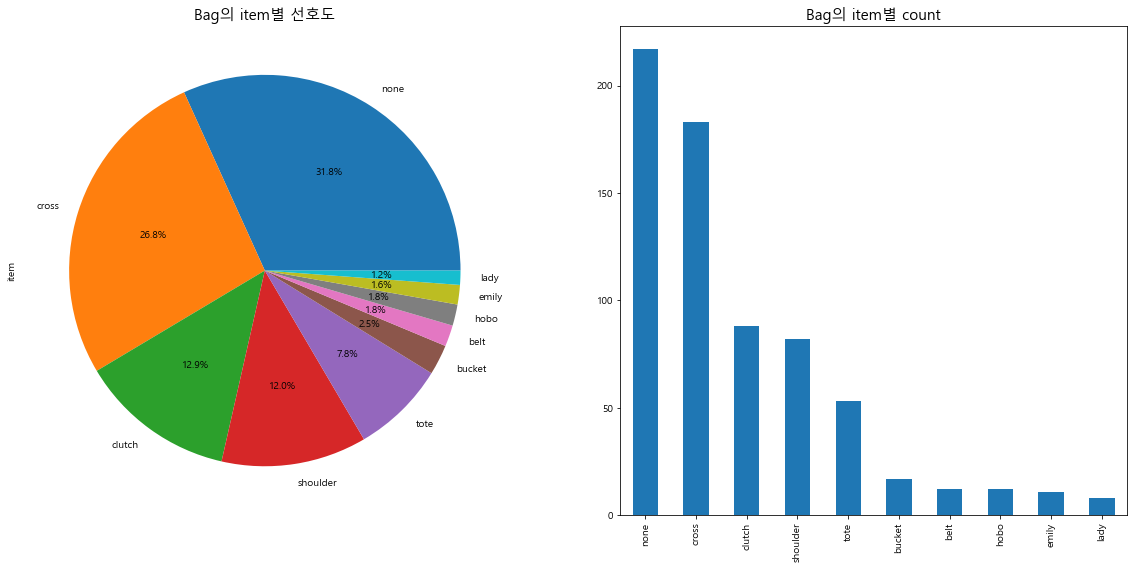

In [20]:
f, ax = plt.subplots(1,2, figsize = (20,9))

bag['item'].value_counts()[:10].plot.pie(autopct = '%1.1f%%',shadow = False, ax=ax[0])
bag['item'].value_counts()[:10].plot(kind='bar', ax=ax[1])

ax[0].set_title("Bag의 item별 선호도", fontsize = 15)
ax[1].set_title("Bag의 item별 count", fontsize = 15)  

plt.show()

### outer의 세부 제품 선호도

In [21]:
# OUTER의 세부 제품 선호도 
import re
outer = df.query('sub_type=="O"').reset_index()

for i in range(len(outer)):
    outer['component'].iloc[i] = re.split(r'-| ', outer['goodsnm'][i])
    
outer['item'] = 0

def item_exit(item):
    for i in range(len(outer)):
        if (item in outer['component'][i]): 
            outer['item'].iloc[i]=item

In [22]:
outer_list = ['jacket','coat','fur','cardigan','padding','zip-up','cape','trench-coat','blazer','jumper']
    
for i in outer_list:
    item_exit(i)
    
# 중복처리    
for i in range(len(outer)):
    if ('zipup-jumper' in outer['component'][i]):
       outer['item'].iloc[i] = 'zip-up'
    if ('wrap-coat' in outer['component'][i]):
       outer['item'].iloc[i] = 'coat'
    if ('fullzip-jacket' in outer['component'][i]):
       outer['item'].iloc[i] = 'jacket'

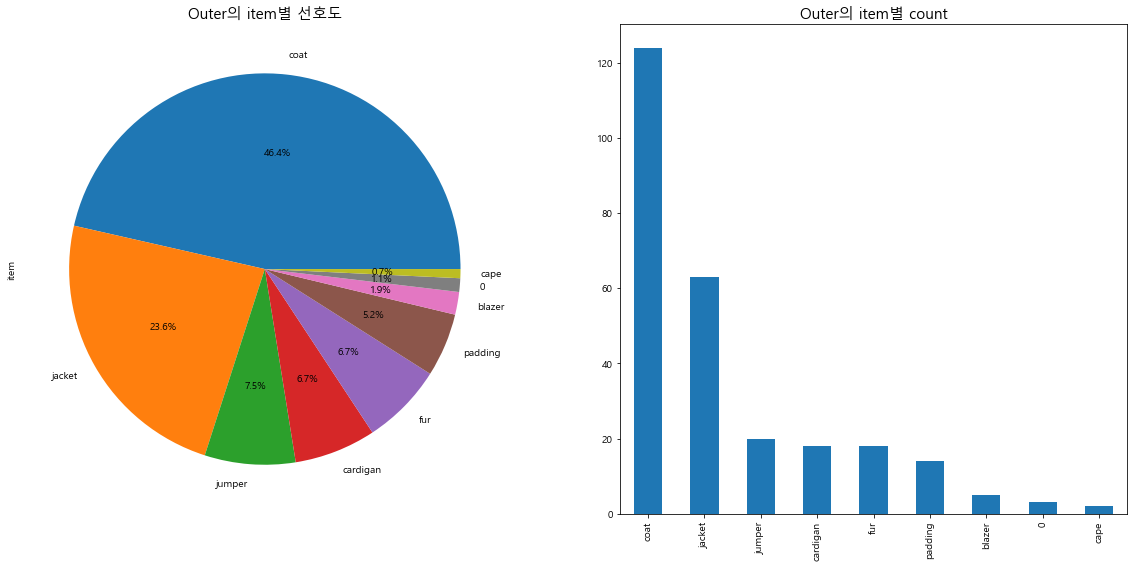

In [23]:
f, ax = plt.subplots(1,2, figsize = (20,9))

outer['item'].value_counts()[:10].plot.pie(autopct = '%1.1f%%',shadow = False, ax=ax[0])
outer['item'].value_counts()[:10].plot(kind='bar', ax=ax[1])

ax[0].set_title("Outer의 item별 선호도", fontsize = 15)
ax[1].set_title("Outer의 item별 count", fontsize = 15)  

plt.show()